## Lesson 3. Classification: Credit worthiness from German bank

#### Student: Rodolfo Lerma

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd
import numpy as np

#Loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_train = pd.DataFrame(data = credit_train)
credit_test = pd.read_csv('credit_test.csv')
credit_test = pd.DataFrame(data = credit_test)

## Exploring the train and test data set

### Train Data Set

In [2]:
credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


In [3]:
credit_train.shape

(808, 17)

In [4]:
credit_train.dtypes

Class                             object
Duration                           int64
Amount                             int64
InstallmentRatePercentage          int64
ResidenceDuration                  int64
Age                                int64
NumberExistingCredits              int64
NumberPeopleMaintenance            int64
Telephone                          int64
ForeignWorker                      int64
CheckingAccountStatus.lt.0         int64
CheckingAccountStatus.0.to.200     int64
CheckingAccountStatus.gt.200       int64
CreditHistory.ThisBank.AllPaid     int64
CreditHistory.PaidDuly             int64
CreditHistory.Delay                int64
CreditHistory.Critical             int64
dtype: object

The training data set contains 17 columns/features with 808 observations.

### Test Data Set

In [5]:
credit_test.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,42,7882,2,4,45,1,2,1,1,1,0,0,0,1,0,0
1,Bad,24,4870,3,4,53,2,2,1,1,1,0,0,0,0,1,0
2,Good,36,6948,2,2,35,1,1,0,1,0,1,0,0,1,0,0
3,Bad,12,1295,3,1,25,1,1,1,1,0,1,0,0,1,0,0
4,Bad,24,1282,4,2,32,1,1,1,1,1,0,0,0,1,0,0


In [6]:
credit_test.shape

(192, 17)

In [7]:
credit_test.dtypes

Class                             object
Duration                           int64
Amount                             int64
InstallmentRatePercentage          int64
ResidenceDuration                  int64
Age                                int64
NumberExistingCredits              int64
NumberPeopleMaintenance            int64
Telephone                          int64
ForeignWorker                      int64
CheckingAccountStatus.lt.0         int64
CheckingAccountStatus.0.to.200     int64
CheckingAccountStatus.gt.200       int64
CreditHistory.ThisBank.AllPaid     int64
CreditHistory.PaidDuly             int64
CreditHistory.Delay                int64
CreditHistory.Critical             int64
dtype: object

As mentioned before this data set contains 17 features, but for the test set there are only 192 observations.

<h3>Q.0. Write code to display the count of null values in each column<h3>

In [8]:
#Looking for null values in the Train data
print('Train Data')
credit_train.isna().sum()

Train Data


Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

In [9]:
#Looking for null values in the Test data
print('Test Data')
credit_test.isna().sum()

Test Data


Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

It seems there is no null/missing values in the `credit_train` nor on the `credit_test` data set.

In [10]:
hist = credit_train.hist(figsize=(20, 20))

Looking at the distribution of features from this data set it is possible to notice that most of them are binary.

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

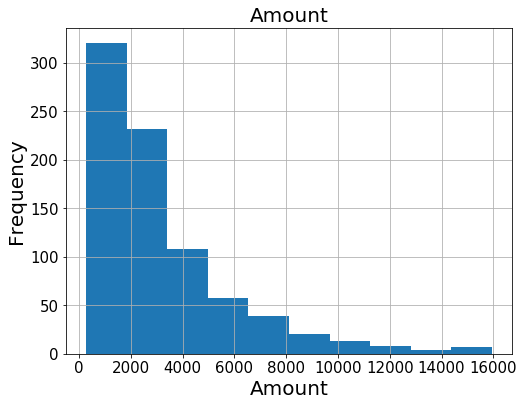

In [11]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Histogram plot function
def histogram_plot(a,b):
    a[b].hist(figsize = (8,6))
    plt.xlabel(b, fontsize = 20)
    plt.ylabel('Frequency',fontsize = 20)
    plt.title(b, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

histogram_plot(credit_train, 'Amount')

One sentence summary:

It does not look like a normal distribution, but as a skewed distribution to the right. One can say that it may look like a Log Normal Distribution.

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [12]:
#Scatter plot function
def scatter_plot(a,b,c):
    ax = plt.figure(figsize=(6, 4)).gca() # define axis
    a.plot.scatter(x = b, y = c, ax = ax)
    ax.set_title(b + ' Vs ' + c, fontsize = 25) # Give the plot a main title
    ax.set_ylabel(c, fontsize = 20)# Set text for y axis
    ax.set_xlabel(b, fontsize = 20)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.grid(True)
    plt.show()

In [13]:
sns.histplot(data=credit_train, x="CreditHistory.Critical", hue="Class").set(title='Critical Histogram split by "Class"')

AttributeError: module 'seaborn' has no attribute 'histplot'

It is possible to notice that in percentage if a person has critical credit history is more likely to be consider Credit worthy compared to a person without critical credit history.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [14]:
credit_train.replace(to_replace = ['Good','Bad'], value = [1,0], inplace = True)
credit_test.replace(to_replace = ['Good','Bad'], value = [1,0], inplace = True)
credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,1,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,0,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,1,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,1,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,1,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


## Correlation Plot

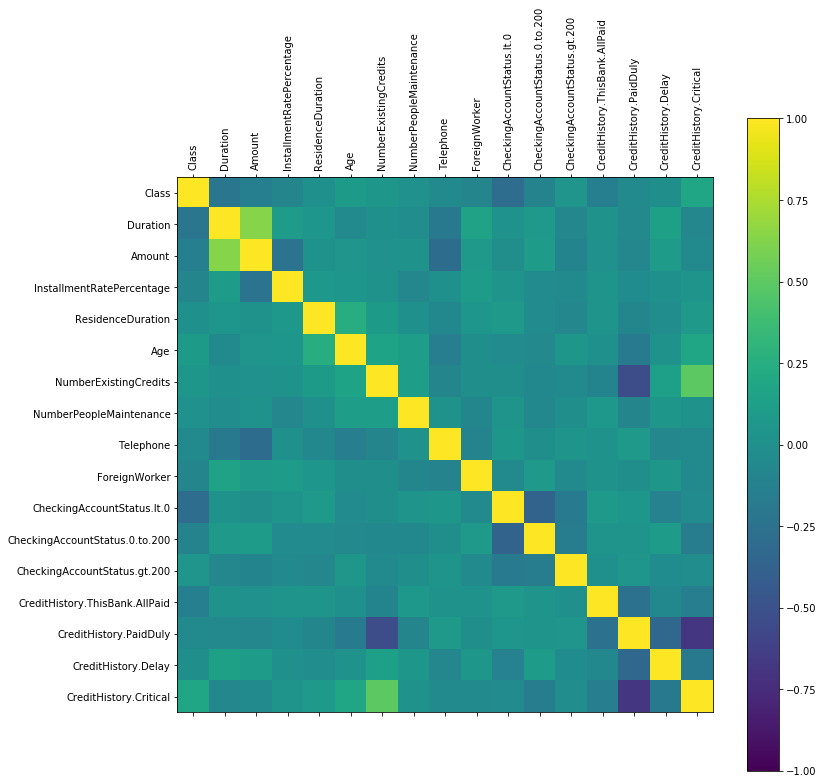

In [15]:
#Correlation plots for all the numerical features
columns = credit_train.columns.tolist()
correlations = credit_train.corr()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,17,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns, fontsize = 10, rotation=90)
ax.set_yticklabels(columns, fontsize = 10)
plt.show()

We can see that there some values that show correlation to other features as well, for example `CreditHistory.PaidDuly` Vs `NumberExistingCredits`.

As for the target variable `Class` it seems there are some small correlations with other variables such as `CheckingAccountStatus.It.0` & `CreditHistory.Critical`

<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [16]:
#import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [17]:
#Splitting the data

#Train dataset
X_train = credit_train[["CreditHistory.Critical"]].astype(int)
y_train = credit_train[["Class"]].astype(int)

#Test dataset
X_test = credit_test[["CreditHistory.Critical"]].astype(int)
y_test = credit_test[["Class"]].astype(int)

In [18]:
#Logistic Regression Sklearn Model
log_reg_sk = LogisticRegression()
log_reg_sk.fit(X_train, y_train)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [19]:
#Logistic Regression Stats Model
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.625326
         Iterations 5


In [20]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  808
Model:                          Logit   Df Residuals:                      807
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Oct 2021   Pseudo R-squ.:                -0.01747
Time:                        05:52:13   Log-Likelihood:                -505.26
converged:                       True   LL-Null:                       -496.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
CreditHistory.Critical     1.6042      0.178      9.023      0.000       1.256       1.953


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [21]:
y_predicted = log_reg.predict(X_test)
prediction = list(map(round, y_predicted))

Text(0.5, 15.0, 'Predicted label')

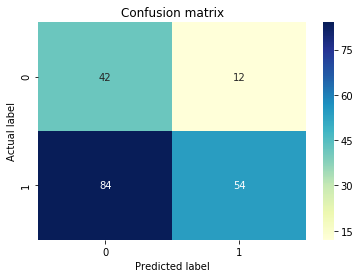

In [22]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import seaborn as sns

#Confusion matrix
cm = confusion_matrix(y_test, prediction)
class_names=[1,0] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [23]:
#Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))
print('Test recall = ', recall_score(y_test, prediction))
print('Test precision = ', precision_score(y_test, prediction))

Test accuracy =  0.5
Test recall =  0.391304347826087
Test precision =  0.8181818181818182


<h3>Q.7. Generate the ROC curve.</h3>

In [25]:
import scikitplot as skplt
from sklearn import metrics

prediction_prob = log_reg_sk.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_prob)
auc = metrics.roc_auc_score(y_test, prediction_prob)

#Receiver operating characteristic plot function
def ROC_plot(a,b,c):
    plt.plot(a,b,label="Test Data, AUC = "+str(c))
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate',fontsize = 12)
    plt.title('ROC Curve', fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()
    
ROC_plot(fpr, tpr, auc)    

ModuleNotFoundError: No module named 'scikitplot'

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [27]:
print('The ROC AUC is = ', auc)

NameError: name 'auc' is not defined

It is possible to see that our model perform just above chance levels or in other words the model has no class separation capacity whatsoever.

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Linear Discriminat Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_predicted_lda = lda.predict(X_test)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
#Parameters from the LDA Model
prior_proba = lda.priors_
group_means = lda.means_
coefficients = lda.coef_

Text(0.5, 15.0, 'Predicted label')

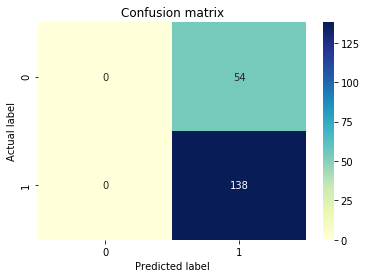

In [31]:
#Confusion matrix for the LDA
cm_lda = confusion_matrix(y_test, y_predicted_lda)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm_lda), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Q.10. What is the accuracy of the new model?</h3>

In [32]:
print('Test accuracy = ', accuracy_score(y_test, y_predicted_lda))
print('Test recall = ', recall_score(y_test, y_predicted_lda))
print('Test precision = ', precision_score(y_test, y_predicted_lda))

Test accuracy =  0.71875
Test recall =  1.0
Test precision =  0.71875


In [33]:
prediction_prob_lda = lda.predict_proba(X_test)[::,1]
fpr_lda, tpr_lda, _ = metrics.roc_curve(y_test,  prediction_prob_lda)
auc_lda = metrics.roc_auc_score(y_test, prediction_prob_lda)
ROC_plot(fpr_lda, tpr_lda, auc_lda) 

NameError: name 'metrics' is not defined

In [ ]:
print('The ROC AUC is = ', auc_lda)

Same as before, the model does not have the ability to separate the classes. Also it is possible to see from the confusion matrix and accuracy level that our model is no better than one that has zero predictive ability to distinguish credit worthiness.

## Model including all variables

### Logistic Regression

In [34]:
# Splitting the data 
columns.remove('Class')

X_train_all = credit_train[columns].astype(int)
y_train_all = credit_train[["Class"]].astype(int)

X_test_all = credit_test[columns].astype(int)
y_test_all = credit_test[["Class"]].astype(int)

In [35]:
#Logistic Regression Model
log_reg_sk_all = LogisticRegression()
log_reg_sk_all.fit(X_train_all, y_train_all)
y_predicted_all = log_reg_sk_all.predict(X_test_all)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
print('Test accuracy = ', accuracy_score(y_test_all, y_predicted_all))
print('Test recall = ', recall_score(y_test_all, y_predicted_all))
print('Test precision = ', precision_score(y_test_all, y_predicted_all))

Test accuracy =  0.6770833333333334
Test recall =  0.8260869565217391
Test precision =  0.75


Better accuracy compared to the model with just `CreditHistory.Critical` as an input.

In [ ]:
prediction_prob_all = log_reg_sk_all.predict_proba(X_test_all)[::,1]
fpr_all, tpr_all, _ = metrics.roc_curve(y_test_all,  prediction_prob_all)
auc_all = metrics.roc_auc_score(y_test_all, prediction_prob_all)
ROC_plot(fpr_all, tpr_all, auc_all)    

### LDA

In [37]:
lda_all = LinearDiscriminantAnalysis()
lda_all.fit(X_train_all, y_train_all)
y_predicted_lda_all = lda_all.predict(X_test_all)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
print('Test accuracy = ', accuracy_score(y_test_all, y_predicted_lda_all))
print('Test recall = ', recall_score(y_test_all, y_predicted_lda_all))
print('Test precision = ', precision_score(y_test_all, y_predicted_lda_all))

Test accuracy =  0.6875
Test recall =  0.8260869565217391
Test precision =  0.76


The LDA model is slightly better than Logistic Regression taking into account all the variables.

In [ ]:
prediction_prob_lda_all = lda_all.predict_proba(X_test_all)[::,1]
fpr_lda_all, tpr_lda_all, _all = metrics.roc_curve(y_test_all,  prediction_prob_lda_all)
auc_lda_all = metrics.roc_auc_score(y_test_all, prediction_prob_lda_all)
ROC_plot(fpr_lda_all, tpr_lda_all, auc_lda_all) 

## Comparison between models

**All features model summary:**

| Model | Accuracy | Precision | Recall | AUC |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.677 | 0.75 | 0.826 | 0.703 |
| LDA | 0.687| 0.76 | 0.826 | 0.729 |

## Comments:
    
My experience with Classification (as with any other Machine Learning Model) is limited but one of the cases my team and I had (in my previous position) where we used classification was in a small tool that we designed to provide a quick response to the finance team on whether or not an engine would get to certain thermodynamic performance level after getting to one of the GE Aviation overhaul shops, based on historical data from the fleet, the current condition of the engine and certain measurements from the test cell. All this with the purpose to help the finance team to provide a first quotation to the potential customer. 

In this particular model there were many challenges, but the most relevant were:
- In this case all the input data was available (not missing data), but cleaning and preparing the data is really important. Initially during this assignment when I transformed the target variable instead of changing the values to 0 & 1 I changed the values to "0" & "1" (strings) which created a series of problems when I tried to calculate the performance parameters comparing the prediction with the test data. It took me sometime to figure things out, but I got better understanding of the importance of getting the right data to the model and understanding what is being inputted.
- How to know what performance parameter to optimize.
	- This seems to be more of a domain knowledge question, to determine which is more important to avoid (False Negatives, False Positives or something in between)
- Feature selection.
	- It is possible to see that the model with just one feature is not the best for this particular model, and even tough domain knowledge probably would help on this, using a feature engineering tool to select which features contribute the most would definitely help to the model. 
- Another challenge is to determine which model/tool is better for each particular case/situation, since there is no supreme model that can be used for all situations. For this reason understanding the limitations of each ML model is important to assess the right tool for the problem. 